In [1]:
import numpy as np

def lagrange_interpolation (x_nodes, f_nodes, x):
  length_x_nodes = len(x_nodes)
  result = np.zeros_like(x, dtype = float)

  for i in range(length_x_nodes):
    L = np.ones_like(x, dtype = float)
    for j in range(length_x_nodes):
      if i != j:
        L *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
    result += f_nodes[i] * L

  return result


In [2]:
def hermite_interpolation (x_nodes, f_nodes, df_nodes, x ):
  length_x_nodes = len(x_nodes)
  z = np.repeat(x_nodes, 2)
  Q = np.zeros((2 * length_x_nodes, 2 * length_x_nodes))

  for i in range(length_x_nodes):
    Q[2 * i][0] = f_nodes[i]
    Q[2 * i + 1][0] = f_nodes[i]
    Q[2 * i + 1][1] = df_nodes[i]

    if i != 0:
      Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

  for i in range(2, 2 * length_x_nodes):
    for j in range(2, i + 1):
      Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])

  result = np.zeros_like(x, dtype = float)

  for i in range(2 * length_x_nodes):
    term = Q[i][i]
    for j in range(i):
      term *= (x - z[j])
    result += term

  return result





In [3]:
import matplotlib.pyplot as plt
def plot_results (x, y_interp, x_nodes, y_nodes, title) :
  plt.figure(figsize =(10,6))
  plt.plot(x, y_interp, 'r-' , label = 'Interpolation')

  plt.plot( x_nodes, y_nodes, 'bo', label = 'Nodes', markersize=8)
  plt.grid(True)
  plt.title(title)
  plt.legend()
  plt.show()

def verify_interpolation(x_nodes, f_nodes, x_interp, y_interp ) :
  print(" Values ​​in nodes :")
  for i,(x,f) in enumerate (zip(x_nodes, f_nodes)) :
    y = y_interp[np.abs(x_interp - x).argmin()]
    print(f"x_{i} = {x:.2f}:"
    f"f({x:.2f}) = {f:.6f},"
    f"p({x:.2f}) = {y:.6f}")

In [4]:
x_nodes = np.array([0, 1, 2])
f_nodes = np.array([1, 0, 1])
df_nodes = np.array([0, -1, 0])
x = np.linspace(-1, 3, 500)

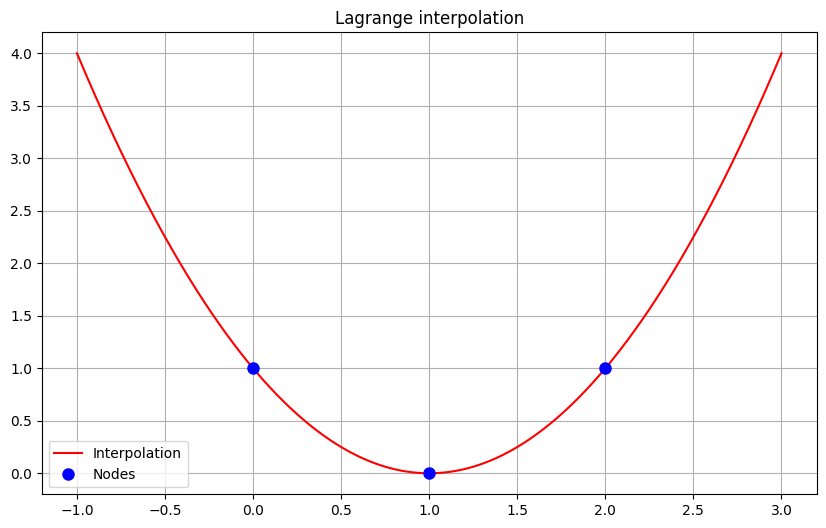

In [5]:
l_inter=lagrange_interpolation(x_nodes, f_nodes, x)
plot_results(x, l_inter, x_nodes, f_nodes, "Lagrange interpolation")

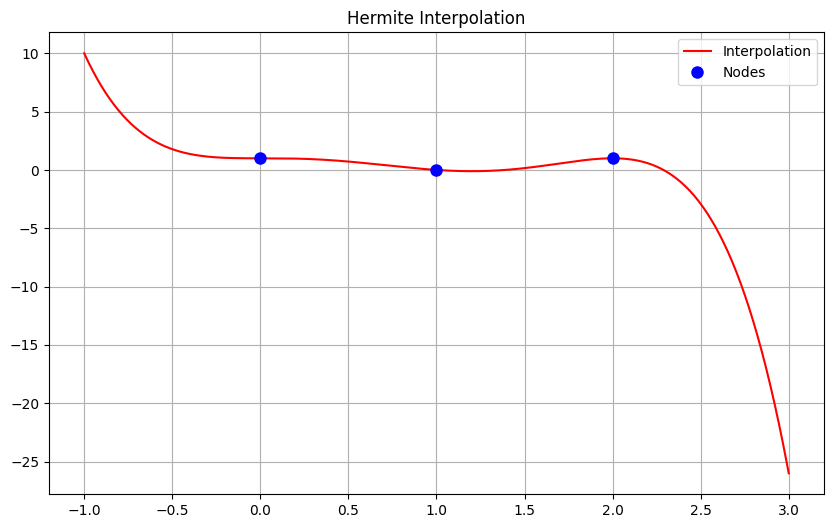

In [6]:
h_inter=hermite_interpolation(x_nodes, f_nodes, df_nodes, x)
plot_results(x, h_inter, x_nodes, f_nodes, "Hermite Interpolation")
